In [94]:
import pandas as pd
import unicodedata
import os
import numpy as np
import json

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter
import seaborn as sns

# import psycopg2
# import psycopg2.extras as extras

# Đánh giá về tìm kiếm ngôi nhà

### Case E
**Complex**  
X1: Khách hàng 40 tuổi, có gia đình, có 2 con, nhóm 2.  
Có sẵn 2 tỷ VND, mỗi tháng chi trả được 40 triệu.  
Cần tìm nhà Q7

In [95]:
output= pd.read_excel('testOutput\\cust_x1.xlsx')
print(len(output))
evaluationDf= output[output['housePerformance'] >= 70].sort_values(by='housePerformance', ascending=False)
print(len(output))
print('Số lượng >= 70%: ', len(evaluationDf))
print(evaluationDf.iloc[0]['housePerformance'])
print(evaluationDf.iloc[-1]['housePerformance'])
print(evaluationDf.keys())
print(evaluationDf["legal_status"].unique())

1259
1259
Số lượng >= 70%:  16
91.3
70.43
Index(['Unnamed: 0', 'executedRuleGroup', 'houseInfo', 'maxScore',
       'houseScore', 'housePerformance', 'buyerInfo', 'id', 'group', 'age',
       'is_married', 'no_child', 'month_income', 'monthly_amt', 'avai_amt',
       'desired_location', 'desired_interiorStatus', 'meta_url', 'meta_code',
       'address_street', 'address_ward', 'address_district', 'address_city',
       'price', 'area', 'area_site', 'area_basebuilt', 'area_netused',
       'area_yard', 'area_length', 'area_width', 'area_front', 'house_noFloor',
       'house_type', 'house_noBasement', 'house_direction', 'in_room_noBed',
       'in_room_noBath', 'in_room_noKitchen', 'in_room_noRelax',
       'in_room_others', 'in_interiorStatus', 'prj_name', 'prj_investor',
       'prj_status', 'prj_tower', 'legal_status', 'other_overview',
       'other_good_outstandingCharacteristics', 'other_good_locationDesc',
       'other_good_community', 'other_good_education', 'overall_info'],
  

In [97]:
for i in range(len(evaluationDf)):
    print('Record no ', i+1,'. Id: ', evaluationDf.iloc[i]['housePerformance'])
    print('Quan huyen: ', evaluationDf.iloc[i][ 'address_district'],
         ' . So phong ngu: ', evaluationDf.iloc[i][ 'in_room_noBed'],
         ' . Gia ban: ', evaluationDf.iloc[i][ 'price'],
         ' . Tinh trang phap ly: ', evaluationDf.iloc[i][ 'legal_status'],
         )
# i=1
# print('Record no ', i+1,'. Id: ', evaluationDf.iloc[0]['housePerformance'])

Record no  1 . Id:  91.3
Quan huyen:  Quận 7  . So phong ngu:  2  . Gia ban:  2450000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  2 . Id:  82.61
Quan huyen:  Quận 7  . So phong ngu:  2  . Gia ban:  2500000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  3 . Id:  80.43
Quan huyen:  Nhà Bè  . So phong ngu:  2  . Gia ban:  2050000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  4 . Id:  79.13
Quan huyen:  Quận 7  . So phong ngu:  2  . Gia ban:  1900000000.0  . Tinh trang phap ly:  HĐ mua bán
Record no  5 . Id:  78.26
Quan huyen:  Quận 4  . So phong ngu:  2  . Gia ban:  2000000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  6 . Id:  78.26
Quan huyen:  Quận 7  . So phong ngu:  2  . Gia ban:  3080000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  7 . Id:  78.26
Quan huyen:  Quận 7  . So phong ngu:  3  . Gia ban:  3200000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  8 . Id:  78.26
Quan huyen:  Quận 7  . So phong ngu:  3  . Gia ban:  3450000000.0  . Tinh trang phap ly:  Sổ hồng
Record

address_district
Quận 7        10
Quận 4         2
Quận 9         2
Nhà Bè         1
Bình Chánh     1
Name: count, dtype: int64
   housePerformance  unique_address_count  \
5             91.30                     1   
4             82.61                     1   
3             80.43                     1   
2             79.13                     1   
1             78.26                     4   
0             70.43                     1   

                    unique_address_list  
5                              [Quận 7]  
4                              [Quận 7]  
3                              [Nhà Bè]  
2                              [Quận 7]  
1  [Quận 4, Quận 7, Bình Chánh, Quận 9]  
0                              [Quận 7]  


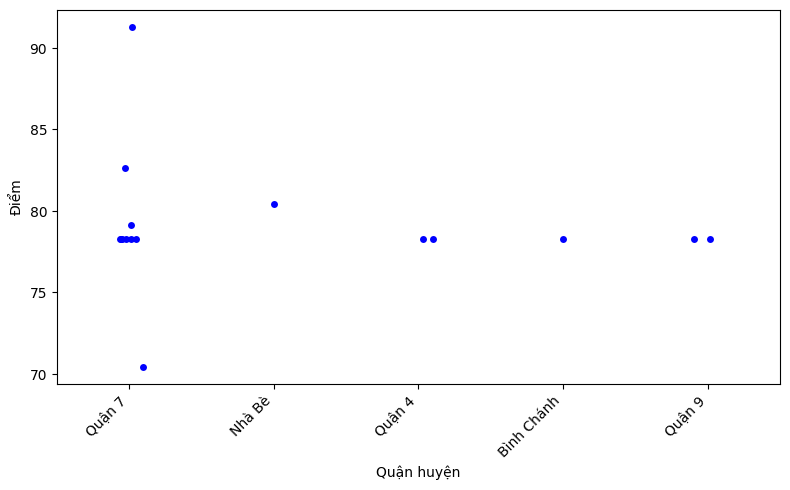

In [98]:
# result = evaluationDf.groupby('housePerformance')['address_district'].agg(list).reset_index()
# print(result)
result = evaluationDf.groupby('housePerformance')['address_district'].agg(['nunique', 'unique']).reset_index().sort_values(by='housePerformance', ascending=False)
result.columns = ['housePerformance', 'unique_address_count', 'unique_address_list']
# print(evaluationDf.groupby('address_district').agg(['count']))
print(evaluationDf['address_district'].value_counts())
print(result)
# print(result.iloc[2]['unique_address_list'])

# Create a box plot
plt.figure(figsize=(8, 5))
sns.stripplot(x='address_district', y='housePerformance', data=evaluationDf, jitter=True, color='blue', marker='o')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment as needed
plt.tight_layout()
plt.xlabel('Quận huyện')
plt.ylabel('Điểm')
plt.savefig('testOutput/chart/testcase_x1_quanhuyen.png')
plt.show()


   housePerformance  unique_bedroom_count unique_bedroom_list
5             91.30                     1                 [2]
4             82.61                     1                 [2]
3             80.43                     1                 [2]
2             79.13                     1                 [2]
1             78.26                     3           [2, 3, 1]
0             70.43                     1                 [2]
in_room_noBed
2    10
3     4
1     2
Name: count, dtype: int64


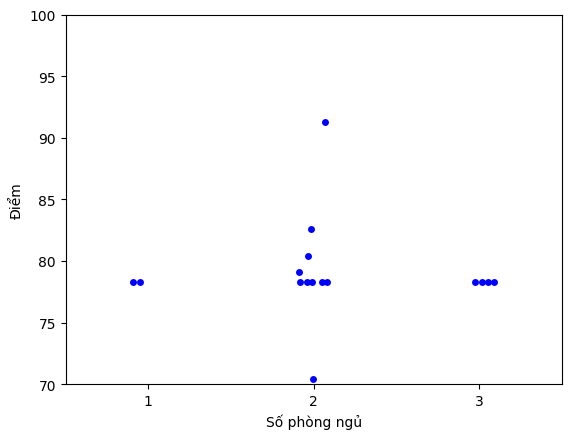

In [99]:
result = evaluationDf.groupby('housePerformance')['in_room_noBed'].agg(['nunique', 'unique']).reset_index().sort_values(by='housePerformance', ascending=False)
result.columns = ['housePerformance', 'unique_bedroom_count', 'unique_bedroom_list']
print(result)

print(evaluationDf['in_room_noBed'].value_counts())

### Chart
# plt.scatter(evaluationDf['in_room_noBed'], evaluationDf['housePerformance'], marker='o', color='blue')
plt.figsize=(2, 1)

stripplot= sns.stripplot(x='in_room_noBed', y='housePerformance', data=evaluationDf, jitter=True, color='blue', marker='o')
# Set labels and title
plt.xlabel('Số phòng ngủ')
plt.ylabel('Điểm')
# plt.title('Scatter Plot of housePerformance vs. in_room_noBed')
# Set the x-axis and y-axis limits
# plt.xlim(1, 5)
plt.ylim(70, 100)
# plt.xticks(range(0, 5))
stripplot.axes.set_xlim(-0.5, len(evaluationDf['address_district'].unique()) - 2.5)
plt.savefig('testOutput/chart/testcase_x1_phongngu.png')

# Show the plot
plt.show()

Min  1800000000.0
Max  3950000000.0
   housePerformance  unique_price_count  \
5             91.30                   1   
4             82.61                   1   
3             80.43                   1   
2             79.13                   1   
1             78.26                  10   
0             70.43                   1   

                                                                                                                              unique_price_list  
5                                                                                                                                [2450000000.0]  
4                                                                                                                                [2500000000.0]  
3                                                                                                                                [2050000000.0]  
2                                                                             

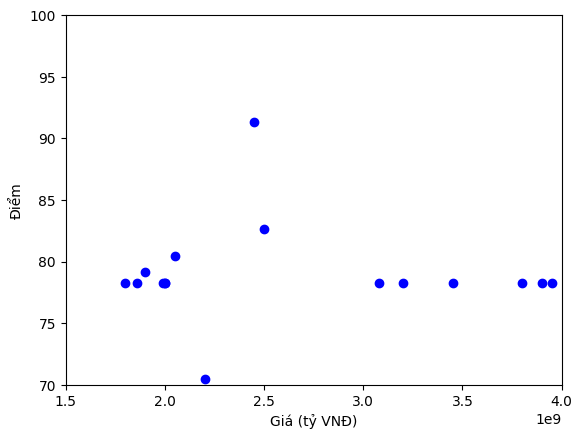

In [102]:
result = evaluationDf.groupby('housePerformance')['price'].agg(['nunique', 'unique']).reset_index().sort_values(by='housePerformance', ascending=False)
result.columns = ['housePerformance', 'unique_price_count', 'unique_price_list']
print('Min ', evaluationDf['price'].min())
print('Max ', evaluationDf['price'].max())

print(result)

# Create a scatter plot
plt.scatter(evaluationDf['price'], evaluationDf['housePerformance'], marker='o', color='blue')

# Set labels and title
plt.xlabel('Giá (tỷ VNĐ)')
plt.ylabel('Điểm')
# plt.title('Scatter Plot of House Performance vs. Price')

plt.xlim(1.5*10**9, 4*10**9)
plt.ylim(70, 100)

plt.savefig('testOutput/chart/testcase_x1_gia.png')

# Show the plot
plt.show()

In [44]:
print(evaluationDf['address_district'].unique())
print(evaluationDf['housePerformance'].unique())

['Quận 4' 'Bình Thạnh' 'Quận 2' 'Tân Phú' 'Tân Bình' 'Quận 5' 'Quận 3'
 'Thủ Đức' 'Gò Vấp' 'Quận 10' 'Hóc Môn' 'Bình Chánh' 'Quận 1' 'Quận 7'
 'Quận 12' 'Quận 9' 'Quận 8']
[92.69 91.54 86.92 85.77 85.   80.   79.23 78.08 77.31 76.15 73.46 72.31
 71.92 71.54 70.38]


**X2**: Khách hàng 40 tuổi, có gia đình, có 2 con, nhóm 4.  
Có sẵn 5 tỷ VND, mỗi tháng chi trả được 50 triệu.  
Cần tìm nhà Q7

In [103]:
output= pd.read_excel('testOutput\\cust_x2.xlsx')
print(len(output))
evaluationDf= output[output['housePerformance'] >= 70].sort_values(by='housePerformance', ascending=False)
print(len(output))
print('Số lượng >= 70%: ', len(evaluationDf))
print(evaluationDf.iloc[0]['housePerformance'])
print(evaluationDf.iloc[-1]['housePerformance'])
print(evaluationDf.keys())
print(evaluationDf["legal_status"].unique())

1259
1259
Số lượng >= 70%:  236
100.0
71.74
Index(['Unnamed: 0', 'executedRuleGroup', 'houseInfo', 'maxScore',
       'houseScore', 'housePerformance', 'buyerInfo', 'id', 'group', 'age',
       'is_married', 'no_child', 'month_income', 'monthly_amt', 'avai_amt',
       'desired_location', 'desired_interiorStatus', 'meta_url', 'meta_code',
       'address_street', 'address_ward', 'address_district', 'address_city',
       'price', 'area', 'area_site', 'area_basebuilt', 'area_netused',
       'area_yard', 'area_length', 'area_width', 'area_front', 'house_noFloor',
       'house_type', 'house_noBasement', 'house_direction', 'in_room_noBed',
       'in_room_noBath', 'in_room_noKitchen', 'in_room_noRelax',
       'in_room_others', 'in_interiorStatus', 'prj_name', 'prj_investor',
       'prj_status', 'prj_tower', 'legal_status', 'other_overview',
       'other_good_outstandingCharacteristics', 'other_good_locationDesc',
       'other_good_community', 'other_good_education', 'overall_info'],


legal_status
Sổ hồng       189
HĐ mua bán     42
Sổ đỏ           5
Name: count, dtype: int64
   housePerformance legal_status  count
0             71.74      Sổ hồng     10
1             72.17   HĐ mua bán     42
2             73.91      Sổ hồng      2
3             78.26      Sổ hồng     67
4             78.26        Sổ đỏ      3
5             82.61      Sổ hồng     19
6             89.13      Sổ hồng     36
7             89.13        Sổ đỏ      2
8             95.65      Sổ hồng      1
9            100.00      Sổ hồng     54


C:\Users\phank\AppData\Local\Temp\ipykernel_8396\1771705367.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='legal_status', y='housePerformance', data=evaluationDf, palette='Set2', jitter=True)


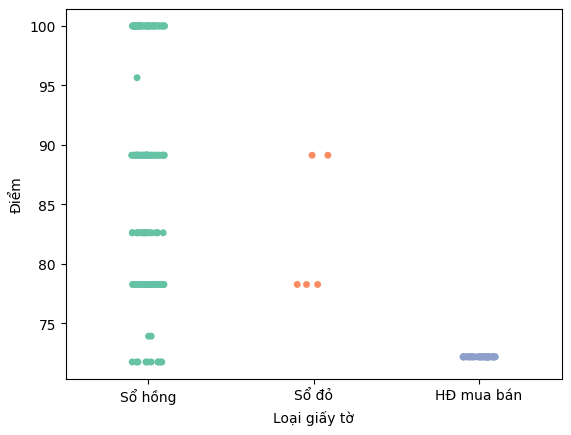

In [104]:
result= evaluationDf.groupby(['housePerformance', 'legal_status']).size().reset_index(name='count')

print(evaluationDf['legal_status'].value_counts())
print(result)

# Plot a bar chart
sns.stripplot(x='legal_status', y='housePerformance', data=evaluationDf, palette='Set2', jitter=True)
plt.xlabel('Loại giấy tờ')
plt.ylabel('Điểm')
# plt.title('House Performance by Legal Status')
plt.savefig('testOutput/chart/testcase_x2_phaply.png')
plt.show()

address_district
Quận 2        148
Bình Thạnh     39
Quận 4         12
Quận 7          8
Quận 9          4
Thủ Đức         4
Quận 3          3
Quận 10         3
Tân Phú         3
Quận 12         2
Tân Bình        2
Bình Chánh      1
Quận 5          1
Bình Tân        1
Quận 8          1
Hóc Môn         1
Quận 1          1
Gò Vấp          1
Nhà Bè          1
Name: count, dtype: int64
   housePerformance  unique_address_count  \
7            100.00                     1   
6             95.65                     1   
5             89.13                     5   
4             82.61                     1   
3             78.26                    14   
2             73.91                     1   
1             72.17                     1   
0             71.74                     3   

                                                                                                             unique_address_list  
7                                                                             

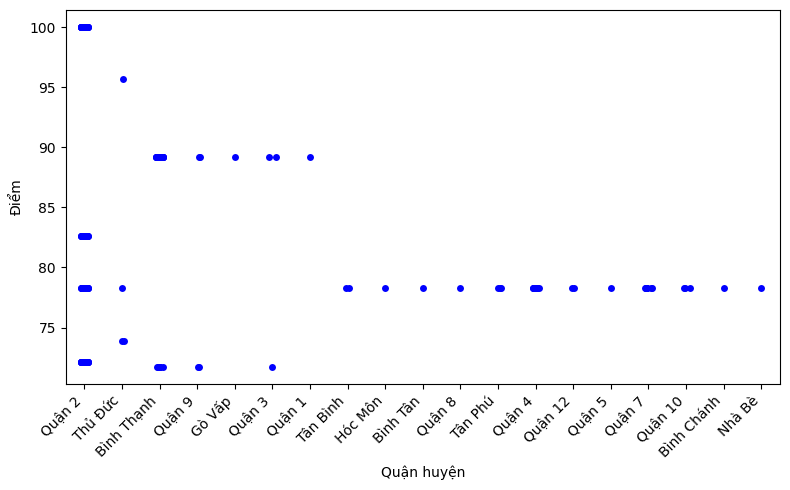

In [105]:
# result = evaluationDf.groupby('housePerformance')['address_district'].agg(list).reset_index()
# print(result)
result = evaluationDf.groupby('housePerformance')['address_district'].agg(['nunique', 'unique']).reset_index().sort_values(by='housePerformance', ascending=False)
result.columns = ['housePerformance', 'unique_address_count', 'unique_address_list']
# print(evaluationDf.groupby('address_district').agg(['count']))
print(evaluationDf['address_district'].value_counts())
print(result)
# print(result.iloc[2]['unique_address_list'])

# Create a box plot
plt.figure(figsize=(8, 5))
sns.stripplot(x='address_district', y='housePerformance', data=evaluationDf, jitter=True, color='blue', marker='o')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment as needed
plt.tight_layout()
plt.xlabel('Quận huyện')
plt.ylabel('Điểm')
plt.savefig('testOutput/chart/testcase_x2_quanhuyen.png')
plt.show()


   housePerformance  unique_bedroom_count unique_bedroom_list
7            100.00                     3           [2, 1, 3]
6             95.65                     1                 [2]
5             89.13                     4        [1, 3, 2, 4]
4             82.61                     2              [2, 3]
3             78.26                     4        [2, 3, 1, 4]
2             73.91                     1                 [2]
1             72.17                     3           [2, 3, 1]
0             71.74                     3           [3, 1, 2]
in_room_noBed
2    127
1     57
3     50
4      2
Name: count, dtype: int64


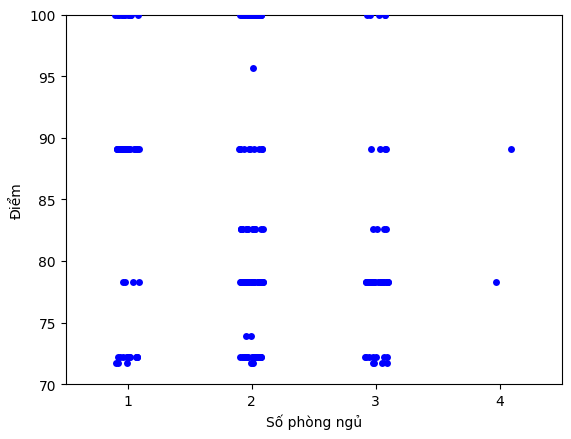

In [106]:
result = evaluationDf.groupby('housePerformance')['in_room_noBed'].agg(['nunique', 'unique']).reset_index().sort_values(by='housePerformance', ascending=False)
result.columns = ['housePerformance', 'unique_bedroom_count', 'unique_bedroom_list']
print(result)

print(evaluationDf['in_room_noBed'].value_counts())

### Chart
# plt.scatter(evaluationDf['in_room_noBed'], evaluationDf['housePerformance'], marker='o', color='blue')
plt.figsize=(4, 1)

stripplot= sns.stripplot(x='in_room_noBed', y='housePerformance', data=evaluationDf, jitter=True, color='blue', marker='o')
# Set labels and title
plt.xlabel('Số phòng ngủ')
plt.ylabel('Điểm')
# plt.title('Scatter Plot of housePerformance vs. in_room_noBed')
# Set the x-axis and y-axis limits
# plt.xlim(1, 5)
plt.ylim(70, 100)
plt.xlim(1, 5)
# plt.xticks(range(0, 5))
stripplot.axes.set_xlim(-0.5, 3.5) #len(evaluationDf['address_district'].unique()) - 6.5
plt.savefig('testOutput/chart/testcase_x2_phongngu.png')

# Show the plot
plt.show()

Min  3200000000.0
Max  7000000000.0
   housePerformance  unique_price_count  \
7            100.00                  24   
6             95.65                   1   
5             89.13                  18   
4             82.61                   8   
3             78.26                  35   
2             73.91                   1   
1             72.17                  25   
0             71.74                   6   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            unique_price_list  
7                                                                               

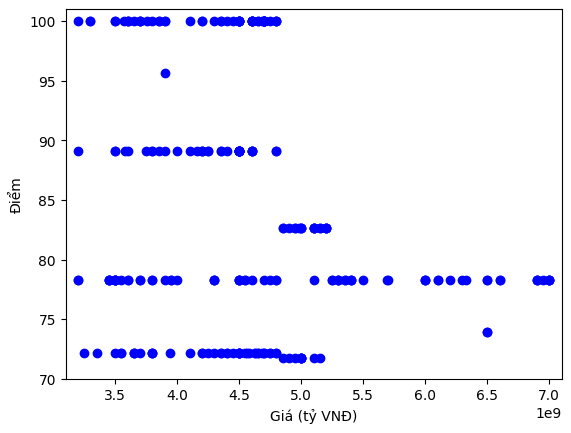

In [109]:
result = evaluationDf.groupby('housePerformance')['price'].agg(['nunique', 'unique']).reset_index().sort_values(by='housePerformance', ascending=False)
result.columns = ['housePerformance', 'unique_price_count', 'unique_price_list']
print('Min ', evaluationDf['price'].min())
print('Max ', evaluationDf['price'].max())

print(result)

# Create a scatter plot
plt.scatter(evaluationDf['price'], evaluationDf['housePerformance'], marker='o', color='blue')

# Set labels and title
plt.xlabel('Giá (tỷ VNĐ)')
plt.ylabel('Điểm')
# plt.title('Scatter Plot of House Performance vs. Price')

plt.xlim(3.1*10**9, 7.1*10**9)
plt.ylim(70, 101)

plt.savefig('testOutput/chart/testcase_x2_gia.png')

# Show the plot
plt.show()

### Case D
**Luật về giấy tờ**  
A1: Khách hàng nhóm 4

In [45]:
output= pd.read_excel('testOutput\\cust_d1.xlsx')
evaluationDf= output
print(evaluationDf.keys())

Index(['Unnamed: 0', 'executedRuleGroup', 'houseInfo', 'maxScore',
       'houseScore', 'housePerformance', 'buyerInfo', 'id', 'group', 'age',
       'is_married', 'no_child', 'month_income', 'monthly_amt', 'avai_amt',
       'desired_location', 'desired_interiorStatus', 'meta_url', 'meta_code',
       'address_street', 'address_ward', 'address_district', 'address_city',
       'price', 'area', 'area_site', 'area_basebuilt', 'area_netused',
       'area_yard', 'area_length', 'area_width', 'area_front', 'house_noFloor',
       'house_type', 'house_noBasement', 'house_direction', 'in_room_noBed',
       'in_room_noBath', 'in_room_noKitchen', 'in_room_noRelax',
       'in_room_others', 'in_interiorStatus', 'prj_name', 'prj_investor',
       'prj_status', 'prj_tower', 'legal_status', 'other_overview',
       'other_good_outstandingCharacteristics', 'other_good_locationDesc',
       'other_good_community', 'other_good_education', 'overall_info'],
      dtype='object')


In [46]:
evaluationDf=evaluationDf.groupby(['housePerformance', 'legal_status']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
print(evaluationDf)

   housePerformance legal_status  count
2               100      Sổ hồng    622
3               100        Sổ đỏ     49
0                20     Giấy tay      1
1                20   HĐ mua bán    566


### Case A
**Luật về số phòng ngủ**  
A1: Khách hàng 30 tuổi, chưa có gia đình và không có con

In [70]:
output_a1= pd.read_excel('testOutput\\cust_a1.xlsx')
evaluationDf_a1= output_a1
evaluationDf_a1=evaluationDf_a1.groupby(['housePerformance', 'in_room_noBed']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
print(len(evaluationDf_a1))
print(evaluationDf_a1.head(12))
print(len(output_a1))

12
    housePerformance  in_room_noBed  count
10                70              1    206
11                70              2    619
8                 60              3    341
9                 60              4     59
0                  0              5     16
1                  0              6      9
2                  0              7      1
3                  0              8      3
4                  0              9      1
5                  0             10      2
6                  0             12      1
7                  0             25      1
1259


A2: Khách hàng nhóm 2, 30 tuổi, có 2 con

In [71]:
output_a2= pd.read_excel('testOutput\\cust_a2.xlsx')
evaluationDf_a2= output_a2
evaluationDf_a2=evaluationDf_a2.groupby(['housePerformance', 'in_room_noBed']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
print(len(evaluationDf_a2))
evaluationDf_a2.head(12)

12


,housePerformance,in_room_noBed,count
9,100,3,341
10,100,4,59
11,100,5,16
8,50,2,619
0,0,1,206
1,0,6,9
2,0,7,1
3,0,8,3
4,0,9,1
5,0,10,2


A3: Khách hàng nhóm 4

In [72]:
output_a3= pd.read_excel('testOutput\\cust_a3.xlsx')
evaluationDf_a3= output_a3
evaluationDf_a3=evaluationDf_a3.groupby(['housePerformance', 'in_room_noBed']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
print(len(evaluationDf_a3))
evaluationDf_a3.head(12)

12


,housePerformance,in_room_noBed,count
9,100,2,619
10,100,3,341
11,100,4,59
8,70,1,206
0,0,5,16
1,0,6,9
2,0,7,1
3,0,8,3
4,0,9,1
5,0,10,2


### Case B
**Luật về Tài chính**  
B1: Khách hàng cần tìm BĐS có với tài sản có sẵn là 1.5 tỷ và có thể chi trả hằng tháng 40.0 triệu

In [78]:
output_b1= pd.read_excel('testOutput\\cust_b1.xlsx')
evaluationDf_b1= output_b1
# evaluationDf_b1.columns
evaluationDf_b1= evaluationDf_b1.groupby(['housePerformance', 'price']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
evaluationDf_b1.head(50)
evaluationDf_b1['price_mln']= evaluationDf_b1['price']/ 1000000

In [80]:
pd.set_option('display.max_colwidth', None)
result = evaluationDf_b1.groupby('housePerformance')['price'].agg(list).reset_index()
result['price'] = result['price'].apply(sorted, reverse=True)
result=result.sort_values(by='housePerformance', ascending=False)
# result.reset_option('display.max_colwidth')
print(result)

   housePerformance  \
4               100   
3                80   
2                60   
1                50   
0                 0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [81]:
print(result.loc[0]['price'])

[155000000000.0, 128000000000.0, 82500000000.0, 80000000000.0, 65000000000.0, 61000000000.0, 60000000000.0, 58000000000.0, 56000000000.0, 53000000000.0, 52000000000.0, 50000000000.0, 48000000000.0, 43000000000.0, 42500000000.0, 39000000000.0, 38000000000.0, 37620000000.0, 37010000000.0, 37000000000.0, 36500000000.0, 36000000000.0, 35000000000.0, 33000000000.0, 32500000000.0, 31000000000.0, 30000000000.0, 29000000000.0, 28000000000.0, 27000000000.0, 26000000000.0, 25000000000.0, 24500000000.0, 24000000000.0, 23000000000.0, 22700000000.0, 22500000000.0, 22000000000.0, 21200000000.0, 21100000000.0, 21000000000.0, 20990000000.0, 20600000000.0, 20500000000.0, 20000000000.0, 19900000000.0, 19800000000.0, 19700000000.0, 19600000000.0, 19400000000.0, 19000000000.0, 18900000000.0, 18700000000.0, 18500000000.0, 18100000000.0, 18000000000.0, 17700000000.0, 17500000000.0, 17000000000.0, 16900000000.0, 16850000000.0, 16800000000.0, 16700000000.0, 16500000000.0, 16200000000.0, 16160000000.0, 1600000

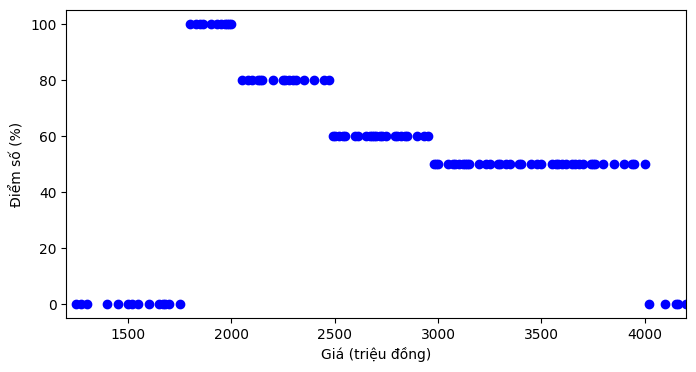

In [82]:
# # Scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(evaluationDf_b1['price_mln'], evaluationDf_b1['housePerformance'], marker='o', color='blue', )
# plt.bar(evaluationDf_b1['price_mln'], evaluationDf_b1['housePerformance'],  color='blue')
# plt.title('Performance of house over price')
plt.xlabel('Giá (triệu đồng)')
plt.ylabel('Điểm số (%)')

plt.xlim(1200, 4200)
plt.savefig('testOutput/chart/testcase_b1.png')
plt.show()

B2: Khách hàng cần tìm BĐS có với tài sản có sẵn là 4 tỷ và có thể chi trả hằng tháng 50.0 triệu

In [83]:
output_b2= pd.read_excel('testOutput\\cust_b2.xlsx')
evaluationDf_b2= output_b2
print(len(output_b2))
# evaluationDf_b1.columns
evaluationDf_b2= evaluationDf_b2.groupby(['housePerformance', 'price']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
evaluationDf_b2.head(50)
evaluationDf_b2['price_mln']= evaluationDf_b2['price']/ 1000000
print(len(evaluationDf_b2))
print(evaluationDf_b2.head(15))
print(evaluationDf_b2['price_mln'].min())
print(evaluationDf_b2['price_mln'].max())

1259
329
     housePerformance         price  count  price_mln
328               100  4.000000e+09      9     4000.0
321               100  3.750000e+09      4     3750.0
314               100  3.600000e+09      9     3600.0
315               100  3.620000e+09      1     3620.0
316               100  3.650000e+09      4     3650.0
318               100  3.680000e+09      1     3680.0
319               100  3.700000e+09     11     3700.0
320               100  3.740000e+09      1     3740.0
317               100  3.660000e+09      1     3660.0
322               100  3.760000e+09      1     3760.0
323               100  3.800000e+09     11     3800.0
324               100  3.850000e+09      6     3850.0
325               100  3.900000e+09      9     3900.0
326               100  3.940000e+09      1     3940.0
327               100  3.950000e+09      2     3950.0
1150.0
155000.0


In [84]:
pd.set_option('display.max_colwidth', None)
result = evaluationDf_b2.groupby('housePerformance')['price'].agg(list).reset_index()
result['price'] = result['price'].apply(sorted, reverse=True)
result=result.sort_values(by='housePerformance', ascending=False)
# result.reset_option('display.max_colwidth')
print(result)

   housePerformance  \
4               100   
3                80   
2                60   
1                50   
0                 0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

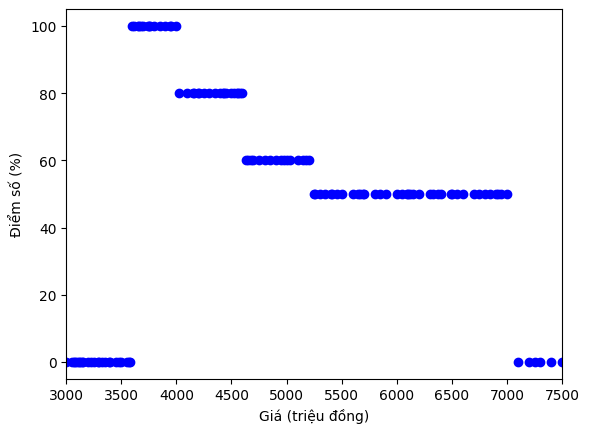

In [85]:
# # Scatter plot
plt.scatter(evaluationDf_b2['price_mln'], evaluationDf_b2['housePerformance'], marker='o', color='blue')
# plt.bar(evaluationDf_b1['price_mln'], evaluationDf_b1['housePerformance'],  color='blue')
plt.xlabel('Giá (triệu đồng)')
plt.ylabel('Điểm số (%)')


plt.xlim(3000, 7500)
plt.savefig('testOutput/chart/testcase_b2.png')
plt.show()

### Case c
**Luật về vị trí của bất động sản**  
C1: Khách hàng cần tìm BĐS có vị trí là quận 7

In [67]:
# output_c1= pd.read_excel('testOutput\\cust_c1.xlsx')
# print(output_c1.columns)
# print(output_c1.head(1))
# print(output_c1.iloc[0].get('buyerInfo'))
# # print('---------')
# # # print(outputDf.iloc[0])
# # print(outputDf.iloc[0]['buyerInfo'])
# # print(outputDf.iloc[0]['houseInfo'])
# # print(outputDf.iloc[0]['executedRuleGroup'])
# # print(outputDf.iloc[0]['housePerformance'])
# # print(outputDf.iloc[0]['maxScore'])
output_c1= pd.read_excel('testOutput\\cust_c1.xlsx')
evaluationDf_c1= output_c1
evaluationDf_c1.groupby(['desired_location', 'address_district', 'housePerformance']).size().reset_index(name='count').sort_values(by=['address_district'], ascending=[False])

,desired_location,address_district,housePerformance,count
20,Quận 7,Tân Phú,0,8
19,Quận 7,Tân Bình,0,7
18,Quận 7,Thủ Đức,0,14
17,Quận 7,Quận 9,0,148
16,Quận 7,Quận 8,0,27
15,Quận 7,Quận 7,100,53
14,Quận 7,Quận 6,0,2
13,Quận 7,Quận 5,0,3
12,Quận 7,Quận 4,0,42
11,Quận 7,Quận 3,0,29


*Case C2*  
Khách hàng cần tìm BĐS có vị trí là quận 3

In [68]:
outputDf_c2= pd.read_excel('testOutput\\cust_c2.xlsx')
evaluationDf_c2= outputDf_c2
outputDf_c2.groupby(['desired_location', 'address_district', 'housePerformance']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])

,desired_location,address_district,housePerformance,count
11,Quận 3,Quận 3,100,29
7,Quận 3,Quận 1,100,67
13,Quận 3,Quận 5,80,3
6,Quận 3,Phú Nhuận,80,4
8,Quận 3,Quận 10,80,68
12,Quận 3,Quận 4,80,42
1,Quận 3,Bình Thạnh,80,374
10,Quận 3,Quận 2,50,348
19,Quận 3,Tân Bình,50,7
18,Quận 3,Thủ Đức,50,14


*Case C3*  
Khách hàng cần tìm BĐS có vị trí là Tân Bình

In [69]:
outputDf_c3= pd.read_excel('testOutput\\cust_c3.xlsx')
evaluationDf_c3= outputDf_c3
outputDf_c3.groupby(['desired_location', 'address_district', 'housePerformance']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])

,desired_location,address_district,housePerformance,count
19,Tân Bình,Tân Bình,100,7
20,Tân Bình,Tân Phú,80,8
2,Tân Bình,Bình Tân,80,7
6,Tân Bình,Phú Nhuận,80,4
3,Tân Bình,Gò Vấp,50,5
7,Tân Bình,Quận 1,50,67
8,Tân Bình,Quận 10,50,68
9,Tân Bình,Quận 12,50,13
1,Tân Bình,Bình Thạnh,50,374
11,Tân Bình,Quận 3,50,29


# Legal estimation

*Case D1*  
Đánh giá về tình trạng giấy tờ pháp lý

In [86]:
outputDf_d1= pd.read_excel('testOutput\\cust_d1.xlsx')
evaluationDf_d1= outputDf_d1
# outputDf_d1.columns
outputDf_d1.groupby(['legal_status', 'housePerformance']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])

,legal_status,housePerformance,count
2,Sổ hồng,100,622
3,Sổ đỏ,100,49
0,Giấy tay,20,1
1,HĐ mua bán,20,566
